<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/EV_ESG_FF5FM_Excess_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Effect of ESG Risk ratings on EV Stock Performance

In [25]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.1 MB/s eta 0:00:00


In [2]:
!pip install yesg
!pip install yfinance

  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6105 sha256=39681284ee947fc67e830b9fa61f4796a0b1d48068ef13b5d4052a7b18140a88
  Stored in directory: /root/.cache/pip/wheels/78/8d/48/f5e8ff0315a46301e15c68371e297b460b33e1c846117725bc
Successfully built yesg


##  Complete version with EV ESG, FF3FM and Excess Return as dependent variable

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: BYDDY
No valid ESG data for BYDDY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: VWAGY
No valid ESG data for VWAGY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: HYMTF
No valid ESG data for HYMTF
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: PSNY
No valid ESG data for PSNY


<ipython-input-22-41d19e782065>:121: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data[col].fillna(final_data[col].mean(), inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Regression results for TSLA:
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.95e-06
Time:                        17:33:20   Log-Likelihood:                -128.41
No. Observations:                  33   AIC:                             264.8
Df Residuals:                      29   BIC:                             270.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0560  

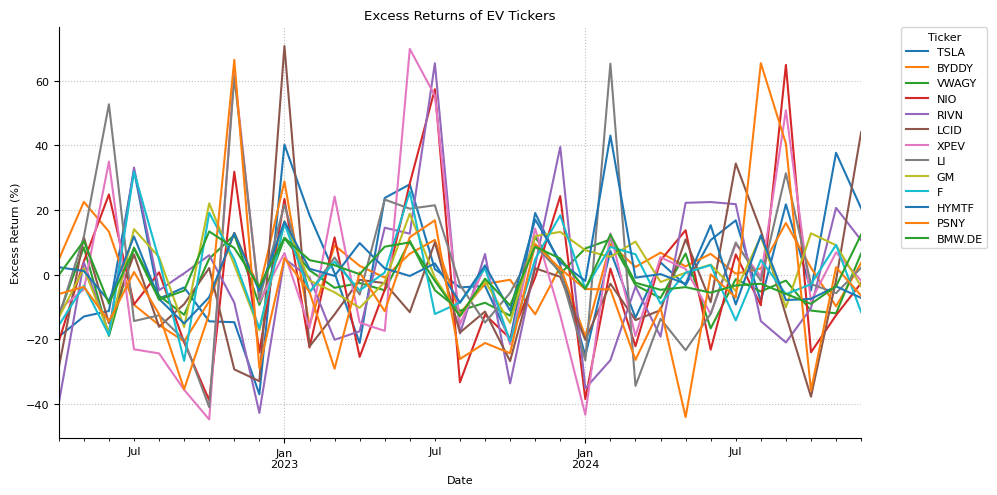

In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import yfinance as yf
import statsmodels.api as sm
import yesg
import numpy as np
from google.colab import files

# Set the plotting style
style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True, "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

# List of EV tickers
ev_tickers = ["TSLA", "BYDDY", "VWAGY", "NIO", "RIVN",
              "LCID", "XPEV", "LI", "GM", "F", "HYMTF", "PSNY", "BMW.DE"]

# Create an empty DataFrame to hold adjusted close prices
adj_close_data = pd.DataFrame()

# Download historical data for each EV ticker
for ticker in ev_tickers:
    try:
        data = yf.download(ticker, start="2022-01-01", end="2024-12-31")

        if data.empty:
            print(f"No data downloaded for {ticker}.")
            continue

        # Store adjusted close prices
        adj_close_data[ticker] = data.get("Adj Close", data["Close"])

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Calculate monthly returns
qqq_monthly = adj_close_data.resample("ME").last().pct_change() * 100  # Monthly returns in percentage
qqq_monthly.dropna(inplace=True)

# Load the Fama-French factors
ff_factors_monthly = pd.read_csv(
    "/content/2022_2024_F-F_Research_Data_Factors.CSV",
    index_col=0,
    header=3,
    on_bad_lines='skip'
)

# Define column names
ff_factors_monthly.columns = ['Mkt-RF', 'SMB', 'HML', 'RF']

# Convert index to datetime
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index.astype(str), format="%Y%m", errors='coerce')
ff_factors_monthly.index = ff_factors_monthly.index + pd.offsets.MonthEnd(0)

# Filter Fama-French factors to match the date range of the stock returns
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= '2022-01-01') & (ff_factors_monthly.index <= '2025-12-31')]

# Ensure that both DataFrames cover the same date range
start_date = max(qqq_monthly.index.min(), ff_factors_monthly.index.min())
end_date = min(qqq_monthly.index.max(), ff_factors_monthly.index.max())

# Filter both DataFrames to the common date range
qqq_monthly = qqq_monthly[(qqq_monthly.index >= start_date) & (qqq_monthly.index <= end_date)]
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= start_date) & (ff_factors_monthly.index <= end_date)]

# Calculate excess returns for each EV ticker
excess_returns = pd.DataFrame(index=qqq_monthly.index)

for ticker in ev_tickers:
    if ticker in qqq_monthly.columns:
        excess_returns[ticker] = qqq_monthly[ticker] - ff_factors_monthly["RF"]

# Fetch ESG data and ensure date alignment
esg_dfs = []

def get_clean_esg_data(ticker):
    esg_data = yesg.get_historic_esg(ticker)
    if esg_data is not None:
        esg_data.columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        esg_data.replace(np.nan, 0, inplace=True)  # Fill NaN with 0
        return esg_data
    else:
        print(f"No data found for ticker: {ticker}")
        return pd.DataFrame()  # Return an empty DataFrame if no data

# Loop to gather ESG data
for ticker in ev_tickers:
    esg_df = get_clean_esg_data(ticker)
    if not esg_df.empty:
        esg_dfs.append(esg_df)
    else:
        print(f"No valid ESG data for {ticker}")

# Merge ESG data with adjusted close prices
if esg_dfs:
    merged_esg_data = esg_dfs[0]
    for df in esg_dfs[1:]:
        merged_esg_data = merged_esg_data.join(df, how='outer')

    # Align dates
    merged_esg_data.index = pd.to_datetime(merged_esg_data.index)  # Ensure the index is datetime
    merged_esg_data = merged_esg_data[(merged_esg_data.index >= start_date) & (merged_esg_data.index <= end_date)]

    # Combine excess returns with ESG data
    final_data = excess_returns.join(merged_esg_data, how='outer')

    # Impute missing ESG values with the mean of the available data
    for ticker in ev_tickers:
        esg_columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        for col in esg_columns:
            if col in final_data.columns:
                final_data[col].fillna(final_data[col].mean(), inplace=True)

    # Save the final combined DataFrame to CSV
    final_data.to_csv('final_combined_data.csv')

    # Download the CSV file
    files.download('final_combined_data.csv')
else:
    print("No valid ESG data retrieved for any ticker.")

# Step 4: Run the Regression Model for each ticker
for ticker in ev_tickers:
    if ticker in excess_returns.columns:
        # Prepare independent variables: Fama-French factors and ESG scores
        X = sm.add_constant(ff_factors_monthly[["Mkt-RF", "SMB", "HML"]])

        # Add ESG variables to the independent variables
        esg_columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']

        # Ensure ESG columns are present before adding them to X
        for col in esg_columns:
            if col in final_data.columns:
                X[col] = final_data[col]
            else:
                print(f"ESG column {col} not found for {ticker}. Skipping.")

        y = excess_returns[ticker].dropna()

        # Ensure y is not empty
        if len(y) == 0:
            print(f"No data for regression on {ticker}.")
            continue

        # Ensure X and y have the same length
        X = X.loc[y.index]

        # Drop rows with NaN values in X or y
        X = X.dropna()
        y = y.loc[X.index]

        if len(y) == 0 or X.empty:
            print(f"No valid data for regression on {ticker} after cleaning.")
            continue

        model = sm.OLS(y, X).fit()
        print(f"Regression results for {ticker}:\n{model.summary()}\n")

# Optional: Plot excess returns
if not excess_returns.empty and not excess_returns.isnull().all().any():
    ax = excess_returns.plot(title="Excess Returns of EV Tickers", figsize=(10, 5))
    plt.xlabel("Date")
    plt.ylabel("Excess Return (%)")

    # Position the legend outside the plot
    plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()
else:
    print("No excess returns data available for plotting.")

### Treat Multicollinearity


In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import yfinance as yf
import statsmodels.api as sm
import yesg
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from google.colab import files
import xlsxwriter

# Set the plotting style
style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True, "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

# List of EV tickers
ev_tickers = ["TSLA", "BYDDY", "VWAGY", "NIO", "RIVN",
              "LCID", "XPEV", "LI", "GM", "F", "HYMTF", "PSNY", "BMW.DE"]

# Create an empty DataFrame to hold adjusted close prices
adj_close_data = pd.DataFrame()

# Download historical data for each EV ticker
for ticker in ev_tickers:
    try:
        data = yf.download(ticker, start="2022-01-01", end="2024-12-31")

        if data.empty:
            print(f"No data downloaded for {ticker}.")
            continue

        # Store adjusted close prices
        adj_close_data[ticker] = data.get("Adj Close", data["Close"])

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Calculate monthly returns
qqq_monthly = adj_close_data.resample("ME").last().pct_change() * 100  # Monthly returns in percentage
qqq_monthly.dropna(inplace=True)

# Load the Fama-French factors
ff_factors_monthly = pd.read_csv(
    "/content/2022_2024_F-F_Research_Data_Factors.CSV",
    index_col=0,
    header=3,
    on_bad_lines='skip'
)

# Define column names
ff_factors_monthly.columns = ['Mkt-RF', 'SMB', 'HML', 'RF']

# Convert index to datetime
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index.astype(str), format="%Y%m", errors='coerce')
ff_factors_monthly.index = ff_factors_monthly.index + pd.offsets.MonthEnd(0)

# Filter Fama-French factors to match the date range of the stock returns
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= '2022-01-01') & (ff_factors_monthly.index <= '2025-12-31')]

# Ensure that both DataFrames cover the same date range
start_date = max(qqq_monthly.index.min(), ff_factors_monthly.index.min())
end_date = min(qqq_monthly.index.max(), ff_factors_monthly.index.max())

# Filter both DataFrames to the common date range
qqq_monthly = qqq_monthly[(qqq_monthly.index >= start_date) & (qqq_monthly.index <= end_date)]
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= start_date) & (ff_factors_monthly.index <= end_date)]

# Calculate excess returns for each EV ticker
excess_returns = pd.DataFrame(index=qqq_monthly.index)

for ticker in ev_tickers:
    if ticker in qqq_monthly.columns:
        excess_returns[ticker] = qqq_monthly[ticker] - ff_factors_monthly["RF"]

# Fetch ESG data and ensure date alignment
esg_dfs = []

def get_clean_esg_data(ticker):
    esg_data = yesg.get_historic_esg(ticker)
    if esg_data is not None:
        esg_data.columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        esg_data.fillna(0, inplace=True)  # Fill NaN with 0
        print(f"ESG data for {ticker}:\n{esg_data.head()}\n")  # Print the ESG data for verification
        return esg_data
    else:
        print(f"No data found for ticker: {ticker}")
        return pd.DataFrame()  # Return an empty DataFrame if no data

# Loop to gather ESG data
for ticker in ev_tickers:
    esg_df = get_clean_esg_data(ticker)
    if not esg_df.empty:
        esg_dfs.append(esg_df)
    else:
        print(f"No valid ESG data for {ticker}")

# Merge ESG data with adjusted close prices
if esg_dfs:
    merged_esg_data = esg_dfs[0]
    for df in esg_dfs[1:]:
        merged_esg_data = merged_esg_data.join(df, how='outer')

    # Align dates
    merged_esg_data.index = pd.to_datetime(merged_esg_data.index)  # Ensure the index is datetime
    merged_esg_data = merged_esg_data[(merged_esg_data.index >= start_date) & (merged_esg_data.index <= end_date)]

    # Combine excess returns with ESG data
    final_data = excess_returns.join(merged_esg_data, how='outer')

    # Fill all NaN values with 0
    final_data.fillna(0, inplace=True)

    # Remove columns that only contain zeros
    for col in final_data.columns:
        if (final_data[col] == 0).all():
            final_data.drop(col, axis=1, inplace=True)

    # Check merged data
    print("Merged Data with ESG:\n", final_data.head())

# Step 4: Run the Regression Model for each ticker
regression_results = {}  # Dictionary to hold regression results for each ticker

for ticker in ev_tickers:
    if ticker in excess_returns.columns:
        # Prepare independent variables: Fama-French factors and ESG scores
        X = sm.add_constant(ff_factors_monthly[["Mkt-RF", "SMB", "HML"]])

        # Add ESG variables to the independent variables
        esg_columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']

        for col in esg_columns:
            if col in final_data.columns:
                X[col] = final_data[col]
            else:
                print(f"ESG column {col} not found for {ticker}. Skipping.")

        y = excess_returns[ticker].dropna()

        # Ensure y is not empty
        if len(y) == 0:
            print(f"No data for regression on {ticker}.")
            continue

        # Ensure X and y have the same length
        X = X.loc[y.index]

        # Drop rows with NaN values in X or y
        X = X.dropna()
        y = y.loc[X.index]

        if len(y) == 0 or X.empty:
            print(f"No valid data for regression on {ticker} after cleaning.")
            continue

        # Calculate VIF
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Run the regression model
        model = sm.OLS(y, X).fit()

        # Store results in the dictionary
        regression_results[ticker] = {
            "model_summary": model.summary(),
            "vif": vif_data
        }

        print(f"Regression results for {ticker}:\n{model.summary()}\n")
        print(f"VIF for {ticker}:\n{vif_data}\n")

# Save all regression results to an Excel file
with pd.ExcelWriter('regression_results.xlsx', engine='xlsxwriter') as writer:
    for ticker, results in regression_results.items():
        # Save regression summary as a DataFrame
        summary_df = pd.DataFrame(results["model_summary"].tables[1].data[1:], columns=results["model_summary"].tables[1].data[0])
        summary_df.to_excel(writer, sheet_name=f'{ticker}_summary', index=False)

        # Save VIF as a DataFrame
        results["vif"].to_excel(writer, sheet_name=f'{ticker}_vif', index=False)

print("All regression results saved to 'regression_results.xlsx'.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ESG data for TSLA:
            TSLA_ESG  TSLA_E  TSLA_S  TSLA_G
Date                                        
2014-09-01      56.0    62.0    50.0    52.0
2014-10-01      56.0    62.0    50.0    52.0
2014-11-01      56.0    62.0    50.0    52.0
2014-12-01      56.0    62.0    50.0    52.0
2015-01-01      56.0    62.0    50.0    55.0

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: BYDDY
No valid ESG data for BYDDY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: VWAGY
No valid ESG data for VWAGY
ESG data for NIO:
            NIO_ESG  NIO_E  NIO_S  NIO_G
Date                                    
2024-11-01    27.18   4.77   15.2   7.21
2024-12-01    27.18   4.77   15.2   7.21
2025-01-01    27.18   4.77   15.2   7.21
2025-02-01    27.18   4.77   15.2   7.21
2025-03-01    27.18   4.77   15.2   7.21

ESG data for RIVN:
            RIVN_ESG  RIVN_E  

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.

Regression results for BYDDY:
                            OLS Regression Results                            
Dep. Variable:                  BYDDY   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.2328
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.873
Time:                        19:54:43   Log-Likelihood:                -126.62
No. Observations:                  33   AIC:                             261.2
Df Residuals:                      29   BIC:                             267.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8277 

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.

Regression results for LI:
                            OLS Regression Results                            
Dep. Variable:                     LI   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.648
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.200
Time:                        19:54:44   Log-Likelihood:                -149.70
No. Observations:                  33   AIC:                             307.4
Df Residuals:                      29   BIC:                             313.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4799    

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### ESG dataset with imputation of nan = 0

In [23]:
# Fetch ESG data and ensure date alignment
esg_dfs = []

def get_clean_esg_data(ticker):
    esg_data = yesg.get_historic_esg(ticker)
    if esg_data is not None:
        esg_data.columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        esg_data.replace(np.nan, 0, inplace=True)  # Fill NaN with 0
        return esg_data
    else:
        print(f"No data found for ticker: {ticker}")
        return pd.DataFrame()  # Return an empty DataFrame if no data

# Loop to gather ESG data
for ticker in ev_tickers:
    esg_df = get_clean_esg_data(ticker)
    if not esg_df.empty:
        esg_dfs.append(esg_df)
    else:
        print(f"No valid ESG data for {ticker}")

# Merge ESG data with adjusted close prices
if esg_dfs:
    merged_esg_data = esg_dfs[0]
    for df in esg_dfs[1:]:
        merged_esg_data = merged_esg_data.join(df, how='outer')

    # Align dates
    merged_esg_data.index = pd.to_datetime(merged_esg_data.index)  # Ensure the index is datetime
    merged_esg_data = merged_esg_data[(merged_esg_data.index >= start_date) & (merged_esg_data.index <= end_date)]

    # Combine excess returns with ESG data
    final_data = excess_returns.join(merged_esg_data, how='outer')

    # Impute missing ESG values with zero
    for ticker in ev_tickers:
        esg_columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        for col in esg_columns:
            if col in final_data.columns:
                final_data[col].fillna(0, inplace=True)  # Fill missing ESG values with 0

    # Save the final combined DataFrame to CSV
    final_data.to_csv('final_combined_data.csv')

    # Download the CSV file
    files.download('final_combined_data.csv')
else:
    print("No valid ESG data retrieved for any ticker.")

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: BYDDY
No valid ESG data for BYDDY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: VWAGY
No valid ESG data for VWAGY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: HYMTF
No valid ESG data for HYMTF
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: PSNY
No valid ESG data for PSNY


<ipython-input-23-3f011d589bd4>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data[col].fillna(0, inplace=True)  # Fill missing ESG values with 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-12-6055eedfbc21>:46: FutureWarning: 'M' is deprecated and will be removed in a future ve

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: BYDDY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: VWAGY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: HYMTF
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: PSNY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Regression results for TSLA:
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.95e-06
Time:                        16:55:16   Log-Likelihood:                -128.41
No. Observations:                  33   AIC:                             264.8
Df Residuals:                      29   BIC:                             270.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9792  

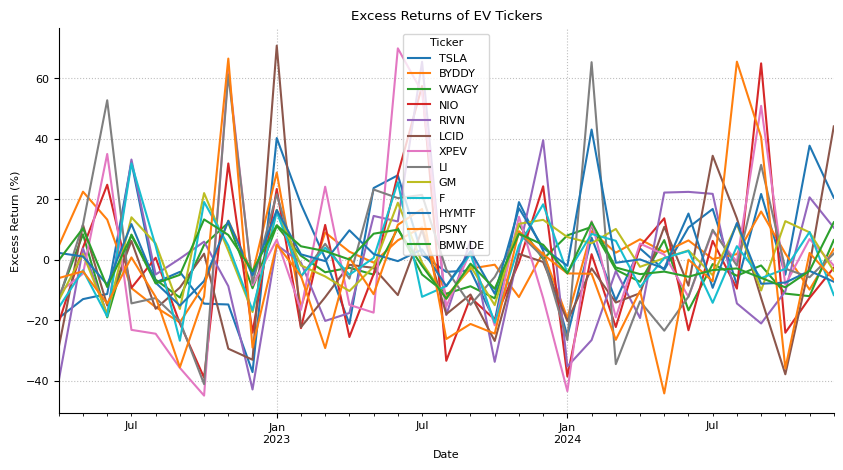

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import yfinance as yf
import statsmodels.api as sm
import yesg
import numpy as np
from google.colab import files

# Set the plotting style
style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True, "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

# List of EV tickers
ev_tickers = ["TSLA", "BYDDY", "VWAGY", "NIO", "RIVN",
              "LCID", "XPEV", "LI", "GM", "F", "HYMTF", "PSNY", "BMW.DE"]

# Create an empty DataFrame to hold adjusted close prices
adj_close_data = pd.DataFrame()

# Download historical data for each EV ticker
for ticker in ev_tickers:
    try:
        data = yf.download(ticker, start="2022-01-01", end="2024-12-31")

        if data.empty:
            print(f"No data downloaded for {ticker}.")
            continue

        # Store adjusted close prices
        adj_close_data[ticker] = data.get("Adj Close", data["Close"])

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Calculate monthly returns
qqq_monthly = adj_close_data.resample("M").last().pct_change() * 100  # Monthly returns in percentage
qqq_monthly.dropna(inplace=True)

# Load the Fama-French factors
ff_factors_monthly = pd.read_csv(
    "/content/2022_2024_F-F_Research_Data_Factors.CSV",
    index_col=0,
    header=3,
    on_bad_lines='skip'
)

# Define column names
ff_factors_monthly.columns = ['Mkt-RF', 'SMB', 'HML', 'RF']

# Convert index to datetime
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index.astype(str), format="%Y%m", errors='coerce')
ff_factors_monthly.index = ff_factors_monthly.index + pd.offsets.MonthEnd(0)

# Filter Fama-French factors to match the date range of the stock returns
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= '2022-01-01') & (ff_factors_monthly.index <= '2025-12-31')]

# Ensure that both DataFrames cover the same date range
start_date = max(qqq_monthly.index.min(), ff_factors_monthly.index.min())
end_date = min(qqq_monthly.index.max(), ff_factors_monthly.index.max())

# Filter both DataFrames to the common date range
qqq_monthly = qqq_monthly[(qqq_monthly.index >= start_date) & (qqq_monthly.index <= end_date)]
ff_factors_monthly = ff_factors_monthly[(ff_factors_monthly.index >= start_date) & (ff_factors_monthly.index <= end_date)]

# Calculate excess returns for each EV ticker
excess_returns = pd.DataFrame(index=qqq_monthly.index)

for ticker in ev_tickers:
    if ticker in qqq_monthly.columns:
        excess_returns[ticker] = qqq_monthly[ticker] - ff_factors_monthly["RF"]

# Fetch ESG data and ensure date alignment
esg_dfs = []

def get_clean_esg_data(ticker):
    esg_data = yesg.get_historic_esg(ticker)
    if esg_data is not None:
        esg_data.columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        esg_data.replace(np.nan, 0, inplace=True)
        return esg_data
    else:
        print(f"No data found for ticker: {ticker}")
        return pd.DataFrame()  # Return an empty DataFrame if no data

# Loop to gather ESG data
for ticker in ev_tickers:
    esg_df = get_clean_esg_data(ticker)
    if not esg_df.empty:
        esg_dfs.append(esg_df)

# Merge ESG data with adjusted close prices
if esg_dfs:
    merged_esg_data = esg_dfs[0]
    for df in esg_dfs[1:]:
        merged_esg_data = merged_esg_data.join(df, how='outer')

    # Align dates
    merged_esg_data.index = pd.to_datetime(merged_esg_data.index)  # Ensure the index is datetime
    merged_esg_data = merged_esg_data[(merged_esg_data.index >= start_date) & (merged_esg_data.index <= end_date)]

    # Combine excess returns with ESG data
    final_data = excess_returns.join(merged_esg_data, how='outer')

    # Save the final combined DataFrame to CSV
    final_data.to_csv('final_combined_data.csv')

    # Download the CSV file
    files.download('final_combined_data.csv')
else:
    print("No valid ESG data retrieved for any ticker.")

# Step 4: Run the Regression Model for each ticker
for ticker in ev_tickers:
    if ticker in excess_returns.columns:
        X = sm.add_constant(ff_factors_monthly[["Mkt-RF", "SMB", "HML"]])
        y = excess_returns[ticker].dropna()

        if len(y) == 0:
            print(f"No data for regression on {ticker}.")
            continue

        # Ensure X and y have the same length
        X = X.loc[y.index]

        model = sm.OLS(y, X).fit()
        print(f"Regression results for {ticker}:\n{model.summary()}\n")

# Optional: Plot excess returns
if not excess_returns.empty and not excess_returns.isnull().all().any():
    excess_returns.plot(title="Excess Returns of EV Tickers", figsize=(10, 5))
    plt.xlabel("Date")
    plt.ylabel("Excess Return (%)")
    plt.legend(title="Ticker")
    plt.show()
else:
    print("No excess returns data available for plotting.")

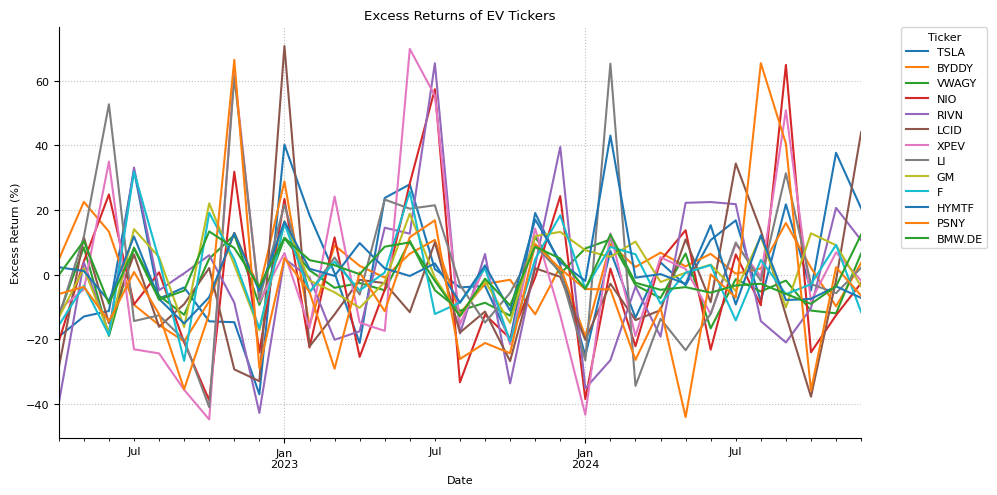

In [20]:
# Optional: Plot excess returns
if not excess_returns.empty and not excess_returns.isnull().all().any():
    ax = excess_returns.plot(title="Excess Returns of EV Tickers", figsize=(10, 5))
    plt.xlabel("Date")
    plt.ylabel("Excess Return (%)")

    # Position the legend outside the plot
    plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()
else:
    print("No excess returns data available for plotting.")

In [4]:
# 1 Climate-friendly Automakers - BMW

# Import libraries
import yesg
import pandas as pd
import numpy as np


#
# All available historic ESG rating for THE  ICE COMPANY
TSLA_med_clim = yesg.get_historic_esg('TSLA')


TSLA_med_clim.columns = ['TSLA_ESG', 'TSLA_E', 'TSLA_S', 'TSLA_G']

# Fill na with 0
TSLA_med_clim = pd.DataFrame(TSLA_med_clim)

# Apply the function inplace
TSLA_med_clim.replace(np.nan, 0, inplace=True)


# Merge
# first_low_bat4 = Sony_Low_bat.join(BOSCH_low_bat, how='outer')

TSLA_med_clim.tail(3)

# Save to csv
#Sony_Low_bat.to_csv(r'/Users/henryefeonomakpo/Downloads/1-Indra-H-Thesis idea/1-saved csv from python/Sony_Low_bat.csv')



,TSLA_ESG,TSLA_E,TSLA_S,TSLA_G
Date,,,,
2025-01-01,24.73,3.20,14.13,7.4
2025-02-01,24.73,3.20,14.13,7.4
2025-03-01,24.57,3.04,14.13,7.4


In [10]:
# Install the yesg package if not already installed
!pip install yesg

# Import libraries
import yesg
import pandas as pd
import numpy as np

# List of EV automakers tickers
tickers = ["TSLA", "LI", "NIO", "LCID", "RIVN", "XPEV", "PSNY", "GM", "F", "HYMTF", "BMW.DE", "BYDDY", "VWAGY"]

# Function to get and clean ESG data
def get_clean_esg_data(ticker):
    esg_data = yesg.get_historic_esg(ticker)
    if esg_data is not None:  # Check if data is retrieved successfully
        esg_data.columns = [f'{ticker}_ESG', f'{ticker}_E', f'{ticker}_S', f'{ticker}_G']
        esg_data.replace(np.nan, 0, inplace=True)  # Fill NaN with 0
        return esg_data
    else:
        print(f"No data found for ticker: {ticker}")
        return pd.DataFrame()  # Return an empty DataFrame if no data

# Initialize a list to hold the dataframes
esg_dfs = []

# Loop through each ticker, retrieve and clean the data
for ticker in tickers:
    esg_df = get_clean_esg_data(ticker)
    if not esg_df.empty:  # Only append non-empty DataFrames
        esg_dfs.append(esg_df)

# Merge all dataframes on the index
if esg_dfs:
    merged_esg_data = esg_dfs[0]
    for df in esg_dfs[1:]:
        merged_esg_data = merged_esg_data.join(df, how='outer')

    # Display the last few rows of the merged dataframe
    print(merged_esg_data.tail())

    # Save the merged dataframe to a CSV file
    merged_esg_data.to_csv('merged_esg_data.csv', index=False)
else:
    print("No valid ESG data retrieved for any ticker.")

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: PSNY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: HYMTF
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: BYDDY
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
No data found for ticker: VWAGY
            TSLA_ESG  TSLA_E  TSLA_S  TSLA_G  LI_ESG  LI_E  LI_S  LI_G  \
Date                                                                     
2024-11-01     24.73    3.20   14.13     7.4   19.51  6.25  6.78  6.47   
2024-12-01     24.73    3.20   14.13     7.4   24.03  9.52  6.78  7.73   
2025-01-01     24.73    3.20   14.13     7.4   23.78  9.27  6.78  7.73   
2025-02-01     24.73    3.20   14.13     7.4   23.78  9.27  6.78  7.73   
2025-03-01     24.57    3.04   14.13     7.4   23

In [7]:
# 1 Climate-friendly Automakers - BMW

# Import libraries
import yesg
import pandas as pd
import numpy as np


#
# All available historic ESG rating for THE  ICE COMPANY
LI_med_clim = yesg.get_historic_esg('LI')


LI_med_clim.columns = ['LI_ESG', 'LI_E', 'LI_S', 'LI_G']

# Fill na with 0
LI_med_clim = pd.DataFrame(LI_med_clim)

# Apply the function inplace
LI_med_clim.replace(np.nan, 0, inplace=True)


# Merge
# first_low_bat4 = Sony_Low_bat.join(BOSCH_low_bat, how='outer')

LI_med_clim.tail(3)

# Save to csv
#Sony_Low_bat.to_csv(r'/Users/henryefeonomakpo/Downloads/1-Indra-H-Thesis idea/1-saved csv from python/Sony_Low_bat.csv')



,LI_ESG,LI_E,LI_S,LI_G
Date,,,,
2025-01-01,23.78,9.27,6.78,7.73
2025-02-01,23.78,9.27,6.78,7.73
2025-03-01,23.78,9.27,6.78,7.73
